# Quantum Fourier Transform Constructed on IonQ Platform

## Brief Description

This notebook program Quantum Fourier Transform gate in general on IonQ Quantum Computing's Platform. The definition of QFT followed by Niesel and Chuang's book. We will start step by step:

1. Define the Quantum Fourier Transform definition
2. Set up IonQ Quantum Computing platform
3. Build a valid QFT control rotate gate function with controlled qubit position, target qubit position, and k (number of position defined in QFT) as parameters.
4. Set up QFT circuit gate
5. Illustration graph of the circuit
6. Example usage for measurement and plotting
7. Experiment Package Forming

## 1. QFT Definition

## 2. Setting up IonQ Platform

- Import pennylane to support visualization of the quantum circuit.
- Import numpy library for scientific constants and tools.
- Os for getting permission on IonQ platform.

In [7]:
import pennylane as qml
import os
from getpass import getpass
import numpy as np
import matplotlib.pyplot as plt

# Account to be set up on IonQ website
# api_key = os.getenv('IONQ_API_KEY') or getpass('MXzNBT3ZB0Xuiu6onAmXGaSqGCclASYq')

# Might need to change if quantum computer access is granted
# Adjust 'wires' for more qubits
dev = qml.device('ionq.simulator', api_key="MXzNBT3ZB0Xuiu6onAmXGaSqGCclASYq", wires=3, shots=1024)

## 3. QFT Individual Control Gate Helper

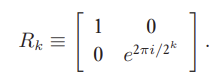

In [8]:

def R(angle, qubit):
    qml.PhaseShift(angle, qubit)

def qft_control_rotate(control: int, target: int, k: int):
    expo = -2 * np.pi / (1 << k)
    qml.ctrl(R, control = control)(expo, target)



## 4. Set up QFT circuit gate

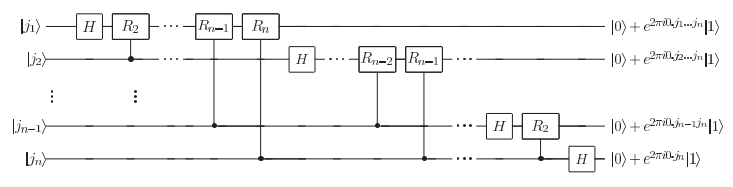

In [9]:
'''
    Gate complexity: O(n^2)
'''

@qml.qnode(dev)
def circuit():
    cnt = circuit.device.num_wires
    for qubit in range(cnt):
        qml.Hadamard(wires=qubit)
        for control in range(qubit + 1, cnt):
            k = control - qubit + 1
            qft_control_rotate(control, qubit, k)

    return qml.counts()



## 5. Illustration of the QFT circuit

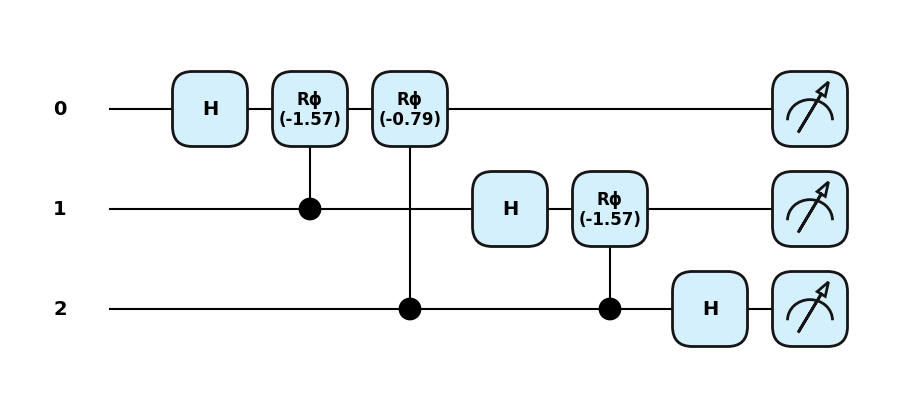

In [10]:
fig, ax = qml.draw_mpl(circuit, style='pennylane', decimals=2)()

## 6. Example usage

{'000': 102, '001': 128, '010': 134, '011': 126, '100': 132, '101': 125, '110': 129, '111': 148}


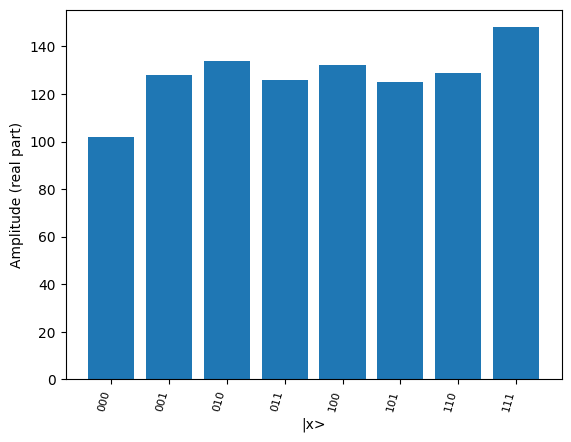

In [11]:
result = circuit()
print(result)

labels = result.keys()
values = result.values()

plt.bar(labels, values)
plt.xlabel("|x>")
plt.ylabel("Amplitude (real part)")
plt.xticks(fontsize=8, rotation=75, ha='right')
plt.show()



## 7. Experiment Package Forming
- Form a counterpart experiment package for the main verification ipynb file with given parameters:
    - A number of qubits used
    - A random configuration of a bitstring of 0's and 1's input state
    - A number of shots for each configuration run
- And returns:
    - A map of counts of each measurement outcome correspond to a configuration input state.

{'00': 230, '01': 267, '10': 272, '11': 255}
{'00000': 33, '00001': 29, '00010': 38, '00011': 25, '00100': 36, '00101': 36, '00110': 24, '00111': 31, '01000': 31, '01001': 30, '01010': 32, '01011': 31, '01100': 43, '01101': 33, '01110': 45, '01111': 33, '10000': 38, '10001': 41, '10010': 26, '10011': 28, '10100': 41, '10101': 31, '10110': 31, '10111': 31, '11000': 25, '11001': 24, '11010': 24, '11011': 27, '11100': 35, '11101': 35, '11110': 33, '11111': 24}


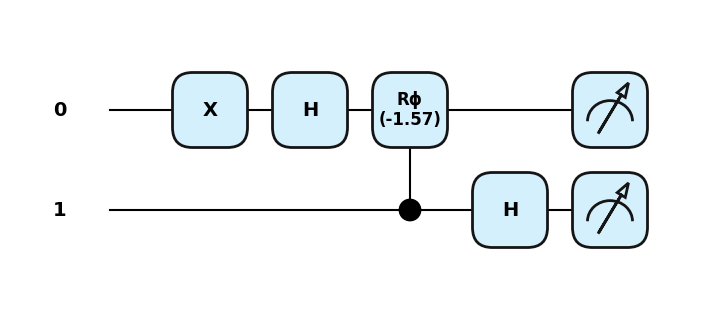

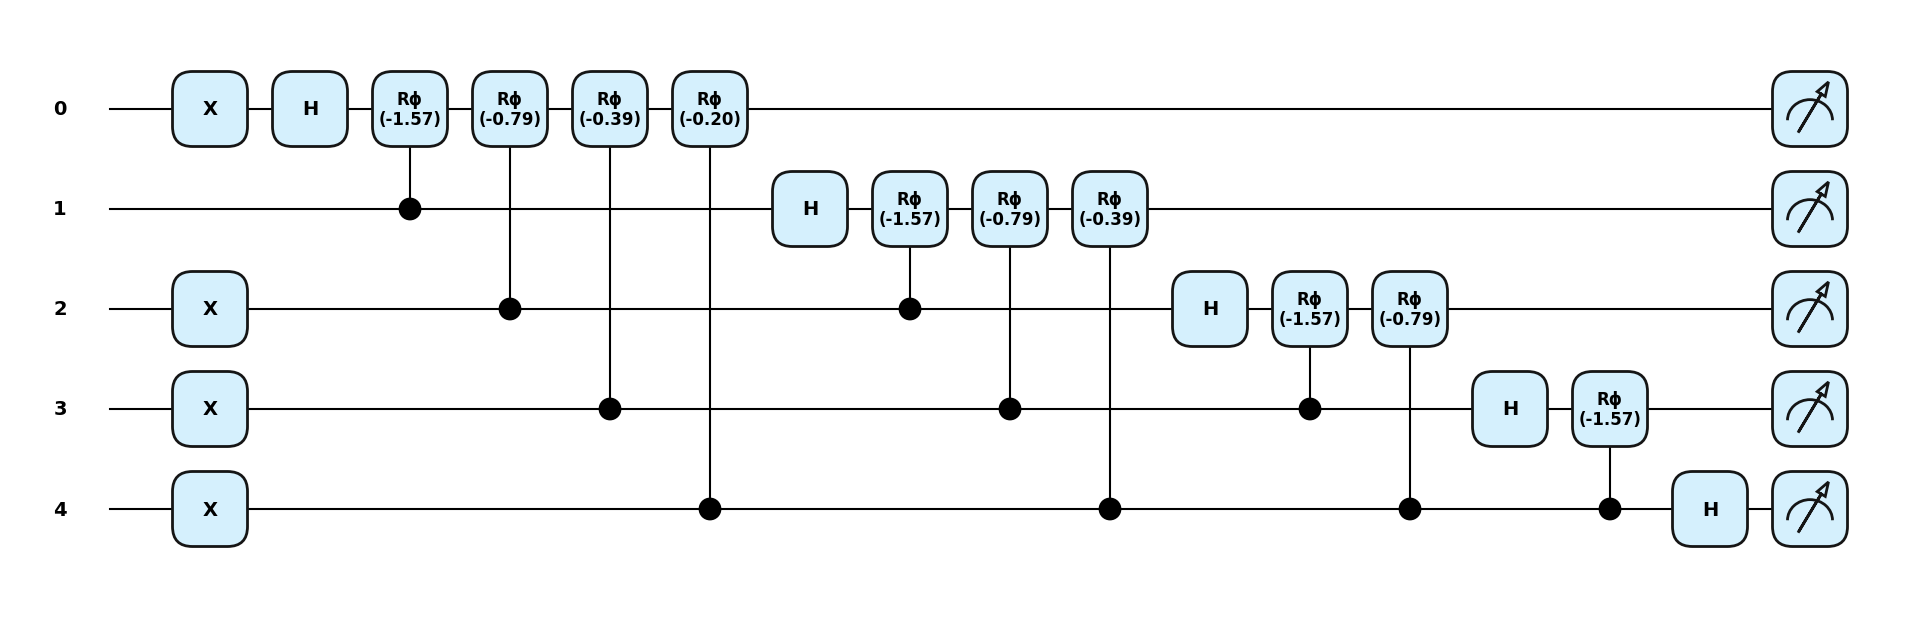

In [12]:
def qft_trapped_ion(n: int, config: list[list[int]], shots=1) -> map:
    # Initilize a new device
    dev = qml.device('ionq.simulator', api_key="MXzNBT3ZB0Xuiu6onAmXGaSqGCclASYq", wires=n, shots=shots)
    
    # We must assign the initial circuit function to every unique circuit created
    @qml.qnode(dev)
    def circuit():
        for i in range(n):
            if config[i] == 1:
                qml.X(i)
            cnt = n
        for qubit in range(cnt):
            qml.Hadamard(wires=qubit)
            for control in range(qubit + 1, cnt):
                k = control - qubit + 1
                qft_control_rotate(control, qubit, k)

        return qml.counts()

    result = circuit()

    fig, ax = qml.draw_mpl(circuit, style='pennylane', decimals=2)()

    return result
    
# Testing
result = qft_trapped_ion(2, [1, 0], 1024)
print(result)

result = qft_trapped_ion(5, [1, 0, 1, 1, 1], 1024)
print(result)

## 8. Simulating Noise

{'00': 258, '01': 275, '10': 254, '11': 237}
{'00000': 31, '00001': 40, '00010': 33, '00011': 22, '00100': 32, '00101': 35, '00110': 33, '00111': 29, '01000': 43, '01001': 35, '01010': 37, '01011': 27, '01100': 36, '01101': 22, '01110': 27, '01111': 38, '10000': 38, '10001': 28, '10010': 28, '10011': 25, '10100': 37, '10101': 36, '10110': 41, '10111': 31, '11000': 32, '11001': 32, '11010': 22, '11011': 30, '11100': 29, '11101': 28, '11110': 28, '11111': 39}


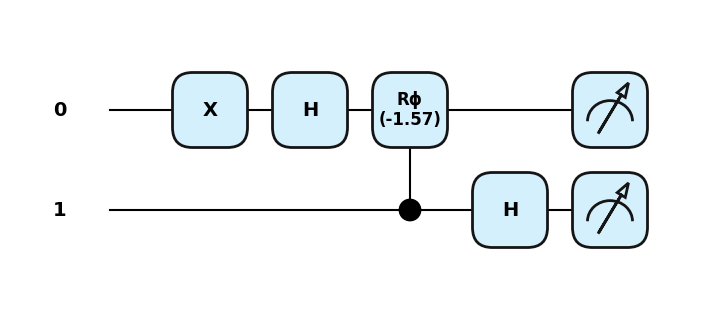

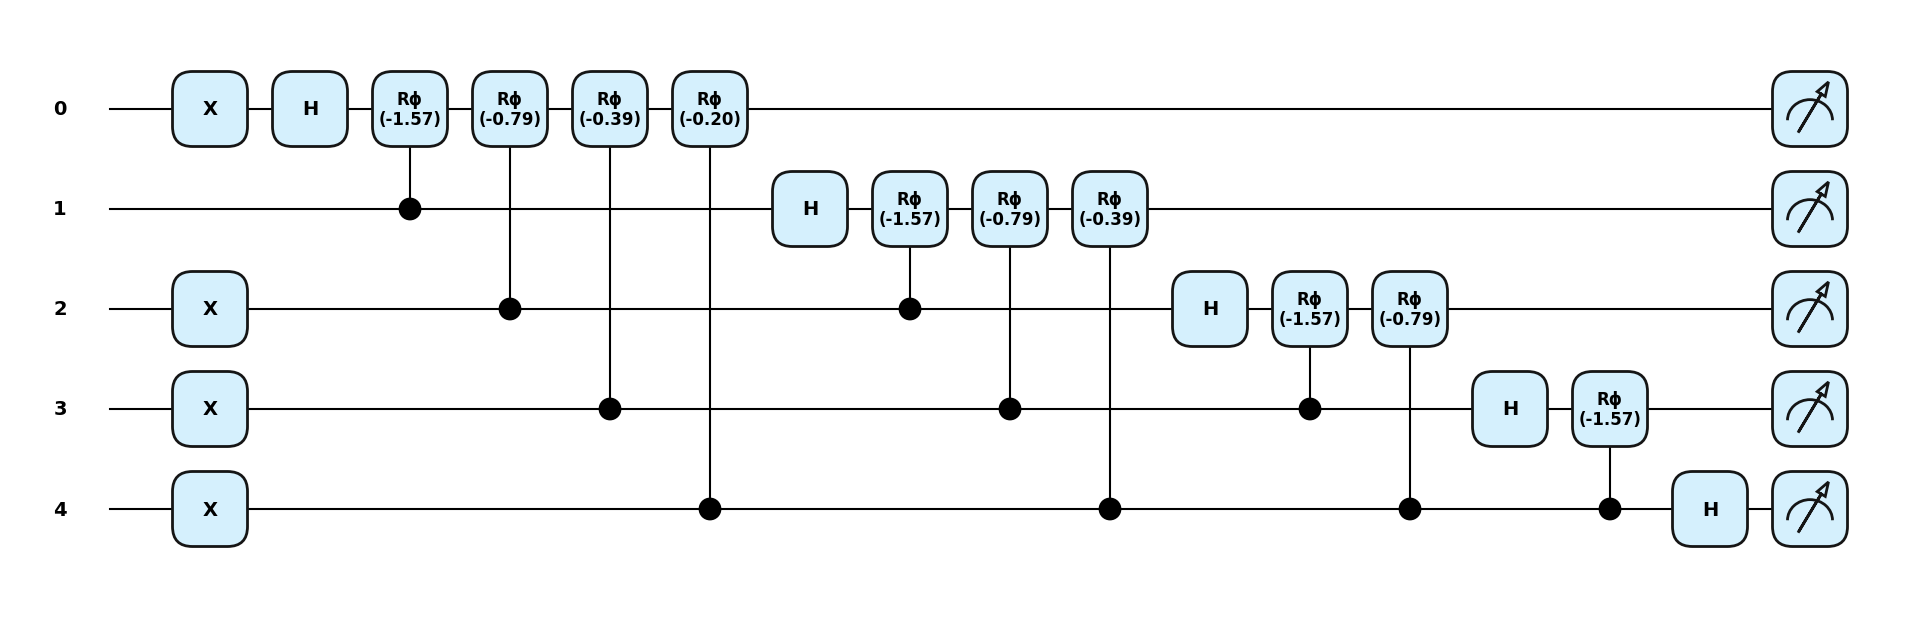

In [ ]:
@qml.qnode(dev)
def noisy_circuit():
    n = circuit.device.num_wires
    qml.DepolarizingChannel(0.02, n)

    return circuit()


def qft_trapped_ion_noisy(n: int, config: list[list[int]], shots=1) -> map:
    # Initilize a new device
    dev = qml.device('ionq.simulator', api_key="MXzNBT3ZB0Xuiu6onAmXGaSqGCclASYq", wires=n, shots=shots)

    # We must assign the initial circuit function to every unique circuit created
    @qml.qnode(dev)
    def circuit():
        # Adding noise
        qml.DepolarizingChannel(0.1, n)

        for i in range(n):
            if config[i] == 1:
                qml.X(i)
            cnt = n
        for qubit in range(cnt):
            qml.Hadamard(wires=qubit)
            for control in range(qubit + 1, cnt):
                k = control - qubit + 1
                qft_control_rotate(control, qubit, k)

        return qml.counts()

    result = circuit()

    fig, ax = qml.draw_mpl(circuit, style='pennylane', decimals=2)()

    return result
    
# Testing
result = qft_trapped_ion(2, [1, 0], 1024)
print(result)

result = qft_trapped_ion(5, [1, 0, 1, 1, 1], 1024)
print(result)

## 9. Run the circuit with noise

### References

- Alonso, Guillermo. “Intro to the Quantum Fourier Transform.” PennyLane Demos, Xanadu, 16 Apr. 2024, pennylane.ai/qml/demos/tutorial_qft.

- Nielsen, Michael A., and Isaac L. Chuang. “Quantum Computation and Quantum Information: 10th Anniversary Edition.” Higher Education from Cambridge University Press, 9 Dec. 2010, www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6AEFFEA52D53BE9AE#overview.